# feature extraction

In [1]:
import cv2
import os # for accessing directory
from tqdm import tqdm

In [2]:
train='C:/Users/KUSH/Documents/train'
pred='C:/Users/KUSH/Documents/test1'

In [3]:
n='cat.1.jpg'
n.split('.')[0]


'cat'

In [4]:
def label_img(img):
    label=img.split('.')
    if label[0]=='cat':
       return 0
    elif label[0]=='dog':
       return 1


In [6]:
from random import shuffle
train_data=[]
def feature_data():
    for i in tqdm(os.listdir(train)):
        label=label_img(i)
        path=os.path.join(train,i)
        feature=cv2.imread(path,0) #for feature extraction nad  0 = grey rgb
        feature=cv2.resize(feature, (50,50))
        train_data.append([feature,label])
    shuffle(train_data)
    return train_data
trainig=feature_data()


100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [02:20<00:00, 178.31it/s]


In [7]:
trainig[0]

[array([[205,  34,  37, ...,   5,   6,   4],
        [ 43, 160,  47, ...,   7,   6,   5],
        [ 42,  27, 144, ...,   5,   5,  36],
        ...,
        [223, 174, 235, ..., 127, 126, 222],
        [226, 181, 234, ...,  59, 117, 130],
        [239, 198, 233, ..., 134, 145, 132]], dtype=uint8), 1]

In [8]:
from random import shuffle
test_data=[]
def feature_d():
    for i in tqdm(os.listdir(pred)):
      #  label=label_img(i)
        path=os.path.join(pred,i)
        feature1=cv2.imread(path,0) #for feature extraction nad  0 = grey rgb
        feature1=cv2.resize(feature1, (50,50))
        test_data.append([feature1])
    shuffle(test_data)
    return test_data
testing=feature_d()

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:57<00:00, 215.70it/s]


In [35]:
#len(os.listdir(pred))
len(testing)

12500

In [36]:
import numpy as nm
training =nm.array(trainig).reshape(25000,2)

In [11]:
n=nm.zeros([25000,2501])
n
training[0][1]

1

[[list[0]],[list[1]]]
we will make single list 

In [12]:
for i in range(25000):
    n[i]=nm.hstack((training[i][0].ravel(),training[i][1]))

In [13]:
n

array([[205.,  34.,  37., ..., 145., 132.,   1.],
       [104., 155., 126., ..., 109., 108.,   1.],
       [ 75.,  84.,  92., ...,  53., 216.,   0.],
       ...,
       [106., 101.,  99., ..., 110., 116.,   1.],
       [ 47.,  48.,  39., ..., 178., 176.,   0.],
       [ 74.,  67.,  75., ..., 158., 157.,   0.]])

In [14]:
X=n[:,:-1] #:2501
Y=n[:,-1:]

In [58]:
nm.shape(X)

(25000, 2500)

In [16]:
import tensorflow as tf

In [17]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # Add input layer
model.add(tf.keras.layers.Dense(256,activation=tf.nn.relu)) # Add 1st hidden layer ,tf.nn.relu returns only +ve values 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # Add 2nd hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Add output layer

In [18]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']) #adam is responsible for backward forward propogation by using gradient algo with help of error (1-prob)

In [19]:
model.fit(X,Y,epochs=5)

Epoch 1/5


17248/25000 [===================>..........] - ETA: 16:06 - loss: 10.2465 - acc: 0.281 - ETA: 5:35 - loss: 8.7882 - acc: 0.4271  - ETA: 3:29 - loss: 8.5973 - acc: 0.450 - ETA: 2:35 - loss: 8.6594 - acc: 0.450 - ETA: 1:53 - loss: 8.6807 - acc: 0.453 - ETA: 1:30 - loss: 8.3823 - acc: 0.473 - ETA: 1:16 - loss: 8.3217 - acc: 0.478 - ETA: 1:06 - loss: 8.2272 - acc: 0.485 - ETA: 59s - loss: 8.2501 - acc: 0.484 - ETA: 54s - loss: 8.2473 - acc: 0.48 - ETA: 50s - loss: 8.1732 - acc: 0.49 - ETA: 46s - loss: 8.2433 - acc: 0.48 - ETA: 43s - loss: 8.1382 - acc: 0.49 - ETA: 41s - loss: 8.1182 - acc: 0.49 - ETA: 40s - loss: 8.0893 - acc: 0.49 - ETA: 39s - loss: 8.0387 - acc: 0.49 - ETA: 37s - loss: 8.0401 - acc: 0.49 - ETA: 36s - loss: 8.1395 - acc: 0.49 - ETA: 35s - loss: 8.1140 - acc: 0.49 - ETA: 34s - loss: 8.1118 - acc: 0.49 - ETA: 33s - loss: 8.0813 - acc: 0.49 - ETA: 33s - loss: 8.0988 - acc: 0.49 - ETA: 32s - loss: 8.0798 - acc: 0.49 - ETA: 32s - loss: 8.0364 - acc: 0.50 - ETA: 31s - loss: 8.0

18272/25000 [====================>.........] - ETA: 19s - loss: 7.5554 - acc: 0.53 - ETA: 20s - loss: 7.5554 - acc: 0.53 - ETA: 19s - loss: 7.8912 - acc: 0.51 - ETA: 20s - loss: 8.0590 - acc: 0.50 - ETA: 20s - loss: 8.1598 - acc: 0.49 - ETA: 20s - loss: 8.1010 - acc: 0.49 - ETA: 20s - loss: 7.8792 - acc: 0.51 - ETA: 20s - loss: 7.9646 - acc: 0.50 - ETA: 20s - loss: 7.8912 - acc: 0.51 - ETA: 20s - loss: 7.9331 - acc: 0.50 - ETA: 19s - loss: 8.1735 - acc: 0.49 - ETA: 19s - loss: 8.2605 - acc: 0.48 - ETA: 19s - loss: 8.2929 - acc: 0.48 - ETA: 19s - loss: 8.2703 - acc: 0.48 - ETA: 19s - loss: 8.1964 - acc: 0.49 - ETA: 19s - loss: 8.1430 - acc: 0.49 - ETA: 19s - loss: 8.1495 - acc: 0.49 - ETA: 18s - loss: 8.0351 - acc: 0.50 - ETA: 18s - loss: 8.0143 - acc: 0.50 - ETA: 18s - loss: 8.0269 - acc: 0.50 - ETA: 18s - loss: 8.0389 - acc: 0.50 - ETA: 18s - loss: 8.0305 - acc: 0.50 - ETA: 18s - loss: 8.0321 - acc: 0.50 - ETA: 18s - loss: 8.0069 - acc: 0.50 - ETA: 18s - loss: 8.0255 - acc: 0.50 - ETA

25000/25000 [==============================] - ETA: 4s - loss: 8.0916 - acc: 0.498 - ETA: 4s - loss: 8.0906 - acc: 0.498 - ETA: 4s - loss: 8.0896 - acc: 0.498 - ETA: 4s - loss: 8.0965 - acc: 0.497 - ETA: 4s - loss: 8.0955 - acc: 0.497 - ETA: 4s - loss: 8.1005 - acc: 0.497 - ETA: 4s - loss: 8.0952 - acc: 0.497 - ETA: 4s - loss: 8.0907 - acc: 0.498 - ETA: 4s - loss: 8.0906 - acc: 0.498 - ETA: 4s - loss: 8.0896 - acc: 0.498 - ETA: 4s - loss: 8.0903 - acc: 0.498 - ETA: 4s - loss: 8.0944 - acc: 0.497 - ETA: 4s - loss: 8.0943 - acc: 0.497 - ETA: 4s - loss: 8.0934 - acc: 0.497 - ETA: 4s - loss: 8.0891 - acc: 0.498 - ETA: 4s - loss: 8.0848 - acc: 0.498 - ETA: 4s - loss: 8.0839 - acc: 0.498 - ETA: 4s - loss: 8.0830 - acc: 0.498 - ETA: 3s - loss: 8.0862 - acc: 0.498 - ETA: 3s - loss: 8.0886 - acc: 0.498 - ETA: 3s - loss: 8.0893 - acc: 0.498 - ETA: 3s - loss: 8.0900 - acc: 0.498 - ETA: 3s - loss: 8.0874 - acc: 0.498 - ETA: 3s - loss: 8.0841 - acc: 0.498 - ETA: 3s - loss: 8.0848 - acc: 0.498 - ETA

18752/25000 [=====================>........] - ETA: 19s - loss: 10.5775 - acc: 0.343 - ETA: 18s - loss: 7.6813 - acc: 0.523 - ETA: 18s - loss: 8.0590 - acc: 0.50 - ETA: 19s - loss: 7.6183 - acc: 0.52 - ETA: 19s - loss: 7.5554 - acc: 0.53 - ETA: 19s - loss: 7.6393 - acc: 0.52 - ETA: 19s - loss: 8.0255 - acc: 0.50 - ETA: 19s - loss: 7.9405 - acc: 0.50 - ETA: 19s - loss: 7.7820 - acc: 0.51 - ETA: 19s - loss: 7.8988 - acc: 0.50 - ETA: 18s - loss: 7.9180 - acc: 0.50 - ETA: 18s - loss: 7.8072 - acc: 0.51 - ETA: 18s - loss: 7.7991 - acc: 0.51 - ETA: 18s - loss: 7.7035 - acc: 0.52 - ETA: 17s - loss: 7.6915 - acc: 0.52 - ETA: 17s - loss: 7.7442 - acc: 0.51 - ETA: 17s - loss: 7.7592 - acc: 0.51 - ETA: 17s - loss: 7.6584 - acc: 0.52 - ETA: 17s - loss: 7.6868 - acc: 0.52 - ETA: 17s - loss: 7.7337 - acc: 0.52 - ETA: 17s - loss: 7.7669 - acc: 0.51 - ETA: 17s - loss: 7.8310 - acc: 0.51 - ETA: 17s - loss: 7.9217 - acc: 0.50 - ETA: 17s - loss: 7.8823 - acc: 0.51 - ETA: 17s - loss: 7.8627 - acc: 0.51 - 

18816/25000 [=====================>........] - ETA: 17s - loss: 8.5627 - acc: 0.46 - ETA: 17s - loss: 7.9331 - acc: 0.50 - ETA: 17s - loss: 8.0590 - acc: 0.50 - ETA: 17s - loss: 7.8352 - acc: 0.51 - ETA: 17s - loss: 7.7843 - acc: 0.51 - ETA: 18s - loss: 8.0203 - acc: 0.50 - ETA: 19s - loss: 8.3277 - acc: 0.48 - ETA: 19s - loss: 8.3850 - acc: 0.47 - ETA: 19s - loss: 8.3241 - acc: 0.48 - ETA: 19s - loss: 8.2030 - acc: 0.49 - ETA: 19s - loss: 8.4094 - acc: 0.47 - ETA: 19s - loss: 8.3814 - acc: 0.48 - ETA: 19s - loss: 8.3389 - acc: 0.48 - ETA: 19s - loss: 8.3543 - acc: 0.48 - ETA: 19s - loss: 8.2865 - acc: 0.48 - ETA: 19s - loss: 8.2727 - acc: 0.48 - ETA: 20s - loss: 8.3469 - acc: 0.48 - ETA: 20s - loss: 8.3994 - acc: 0.47 - ETA: 20s - loss: 8.3690 - acc: 0.48 - ETA: 20s - loss: 8.3907 - acc: 0.47 - ETA: 20s - loss: 8.3870 - acc: 0.47 - ETA: 19s - loss: 8.3766 - acc: 0.48 - ETA: 19s - loss: 8.3572 - acc: 0.48 - ETA: 19s - loss: 8.3593 - acc: 0.48 - ETA: 18s - loss: 8.2972 - acc: 0.48 - ETA

25000/25000 [==============================] - ETA: 4s - loss: 8.0812 - acc: 0.498 - ETA: 4s - loss: 8.0811 - acc: 0.498 - ETA: 4s - loss: 8.0810 - acc: 0.498 - ETA: 4s - loss: 8.0793 - acc: 0.498 - ETA: 4s - loss: 8.0758 - acc: 0.499 - ETA: 4s - loss: 8.0708 - acc: 0.499 - ETA: 4s - loss: 8.0699 - acc: 0.499 - ETA: 4s - loss: 8.0723 - acc: 0.499 - ETA: 3s - loss: 8.0698 - acc: 0.499 - ETA: 3s - loss: 8.0673 - acc: 0.499 - ETA: 3s - loss: 8.0746 - acc: 0.499 - ETA: 3s - loss: 8.0721 - acc: 0.499 - ETA: 3s - loss: 8.0769 - acc: 0.498 - ETA: 3s - loss: 8.0777 - acc: 0.498 - ETA: 3s - loss: 8.0728 - acc: 0.499 - ETA: 3s - loss: 8.0735 - acc: 0.499 - ETA: 3s - loss: 8.0727 - acc: 0.499 - ETA: 3s - loss: 8.0734 - acc: 0.499 - ETA: 3s - loss: 8.0734 - acc: 0.499 - ETA: 3s - loss: 8.0733 - acc: 0.499 - ETA: 3s - loss: 8.0773 - acc: 0.498 - ETA: 3s - loss: 8.0685 - acc: 0.499 - ETA: 3s - loss: 8.0622 - acc: 0.499 - ETA: 3s - loss: 8.0622 - acc: 0.499 - ETA: 3s - loss: 8.0590 - acc: 0.500 - ETA

17344/25000 [===================>..........] - ETA: 23s - loss: 6.5480 - acc: 0.59 - ETA: 23s - loss: 7.7233 - acc: 0.52 - ETA: 22s - loss: 7.6561 - acc: 0.52 - ETA: 21s - loss: 7.8432 - acc: 0.51 - ETA: 20s - loss: 7.4546 - acc: 0.53 - ETA: 20s - loss: 7.3035 - acc: 0.54 - ETA: 19s - loss: 7.4546 - acc: 0.53 - ETA: 19s - loss: 7.4994 - acc: 0.53 - ETA: 18s - loss: 7.5314 - acc: 0.53 - ETA: 18s - loss: 7.4678 - acc: 0.53 - ETA: 18s - loss: 7.4972 - acc: 0.53 - ETA: 18s - loss: 7.5380 - acc: 0.53 - ETA: 18s - loss: 7.6204 - acc: 0.52 - ETA: 18s - loss: 7.7776 - acc: 0.51 - ETA: 18s - loss: 7.6813 - acc: 0.52 - ETA: 18s - loss: 7.7012 - acc: 0.52 - ETA: 18s - loss: 7.7820 - acc: 0.51 - ETA: 18s - loss: 7.8192 - acc: 0.51 - ETA: 18s - loss: 7.8530 - acc: 0.51 - ETA: 18s - loss: 7.8948 - acc: 0.51 - ETA: 18s - loss: 7.8807 - acc: 0.51 - ETA: 18s - loss: 7.8220 - acc: 0.51 - ETA: 18s - loss: 7.8818 - acc: 0.51 - ETA: 18s - loss: 7.8735 - acc: 0.51 - ETA: 17s - loss: 7.9247 - acc: 0.50 - ETA

In [69]:
nm.shape(testing)
testin =nm.array(testing).reshape(12500,2500)
nm.shape(testin)
ped=model.predict((testin))

1295

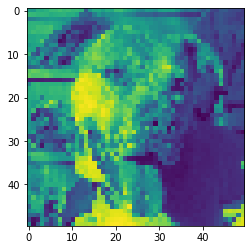

In [80]:
import matplotlib.pyplot as py
import numpy as nm
d=nm.array(testing[20])
d.shape=(50,50)
py.imshow(d)
py.show()

NameError: name 'ped' is not defined